# Building a CNN using Keras

## Dataset : Fashion MNIST 

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Dataset Preparation

#### Sample Dataset (Contains Only 10000 Examples Out of 60000)

In [2]:
x = pd.read_csv("Dataset/fashion-mnist.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape, y.shape)

(10000, 784) (10000,)


In [3]:
print(np.unique(y, return_counts=True)) # Well Balanced

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


In [4]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y) # One-Hot Vectors

print(X_train.shape, Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


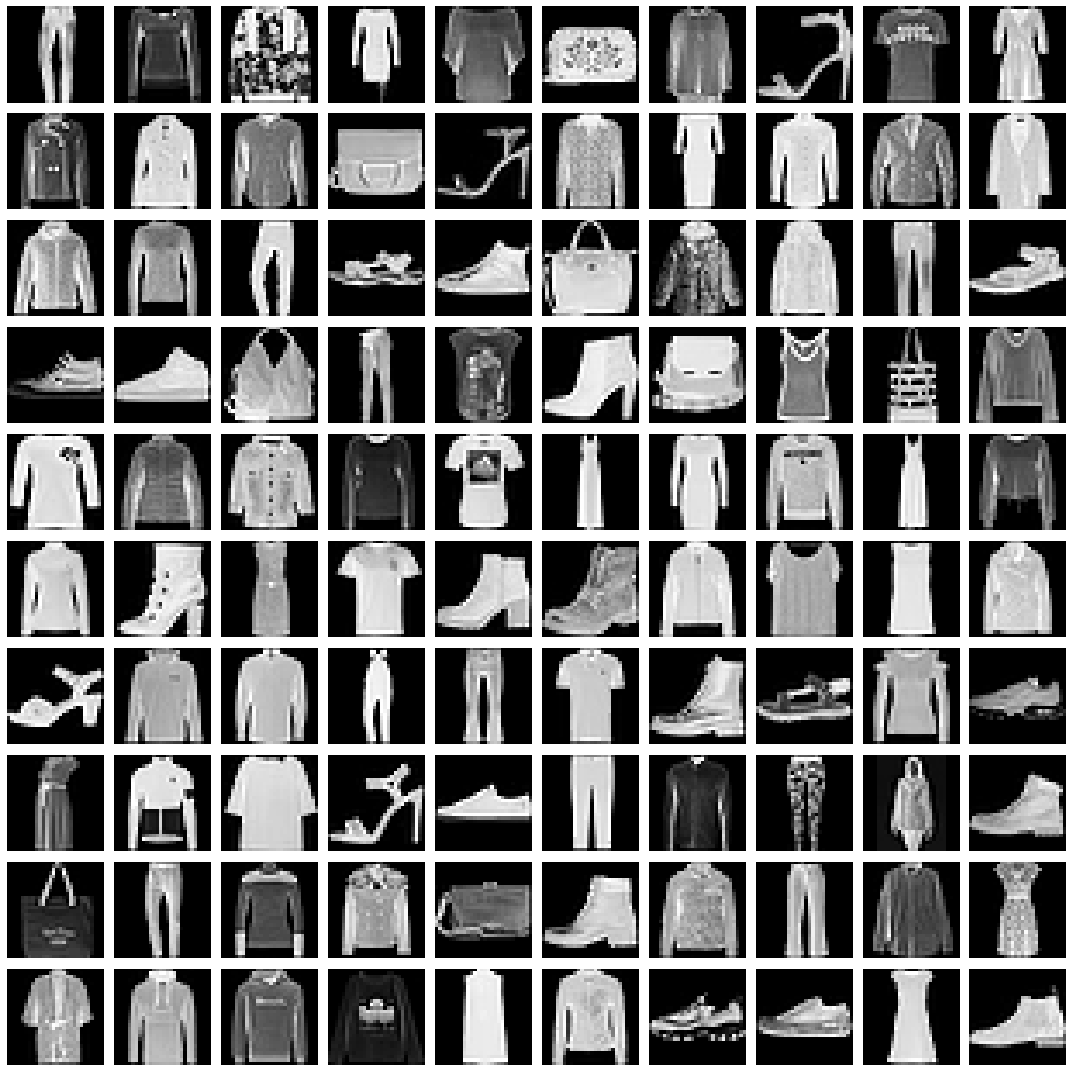

In [5]:
# Visualising The Data
plt.figure(figsize=(15,15))
for i in range(1, 101):
    plt.subplot(10,10,i)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.axis("off")
    plt.tight_layout()
plt.show()

## CNN Model

In [6]:
model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, (5,5), activation='relu'))
model.add(Convolution2D(8, (5,5), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
hist = model.fit(X_train, Y_train, epochs=20, shuffle=True, batch_size=256, validation_split=0.20)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 12s 1ms/step - loss: 1.6286 - accuracy: 0.4072 - val_loss: 1.0063 - val_accuracy: 0.6630
Epoch 2/20
8000/8000 [==============================] - 13s 2ms/step - loss: 0.8455 - accuracy: 0.7005 - val_loss: 0.7446 - val_accuracy: 0.7375
Epoch 3/20
8000/8000 [==============================] - 13s 2ms/step - loss: 0.6897 - accuracy: 0.7485 - val_loss: 0.6584 - val_accuracy: 0.7675
Epoch 4/20
8000/8000 [==============================] - 13s 2ms/step - loss: 0.6224 - accuracy: 0.7722 - val_loss: 0.6074 - val_accuracy: 0.7800
Epoch 5/20
8000/8000 [==============================] - 13s 2ms/step - loss: 0.5765 - accuracy: 0.7918 - val_loss: 0.5850 - val_accuracy: 0.7930
Epoch 6/20
8000/8000 [==============================] - 13s 2ms/step - loss: 0.5362 - accuracy: 0.8091 - val_loss: 0.5417 - val_accuracy: 0.8120
Epoch 7/20
8000/8000 [==============================] - 13s 2ms/step - loss: 0.500

### Visualising The Results

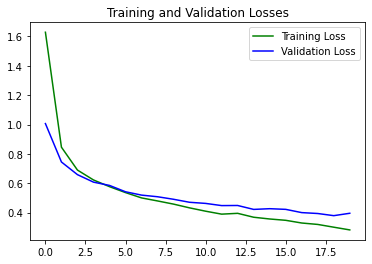

In [9]:
plt.plot(hist.history['loss'],'g',label="Training Loss")
plt.plot(hist.history['val_loss'],'b',label="Validation Loss")
plt.title("Training and Validation Losses")
plt.legend()
plt.show()

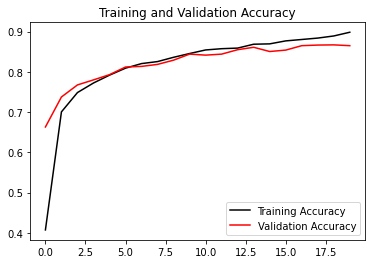

In [10]:
plt.plot(hist.history['accuracy'],'black',label="Training Accuracy")
plt.plot(hist.history['val_accuracy'],'r',label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

### Training The Model On Original Dataset Of 60000 Samples

In [11]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [12]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

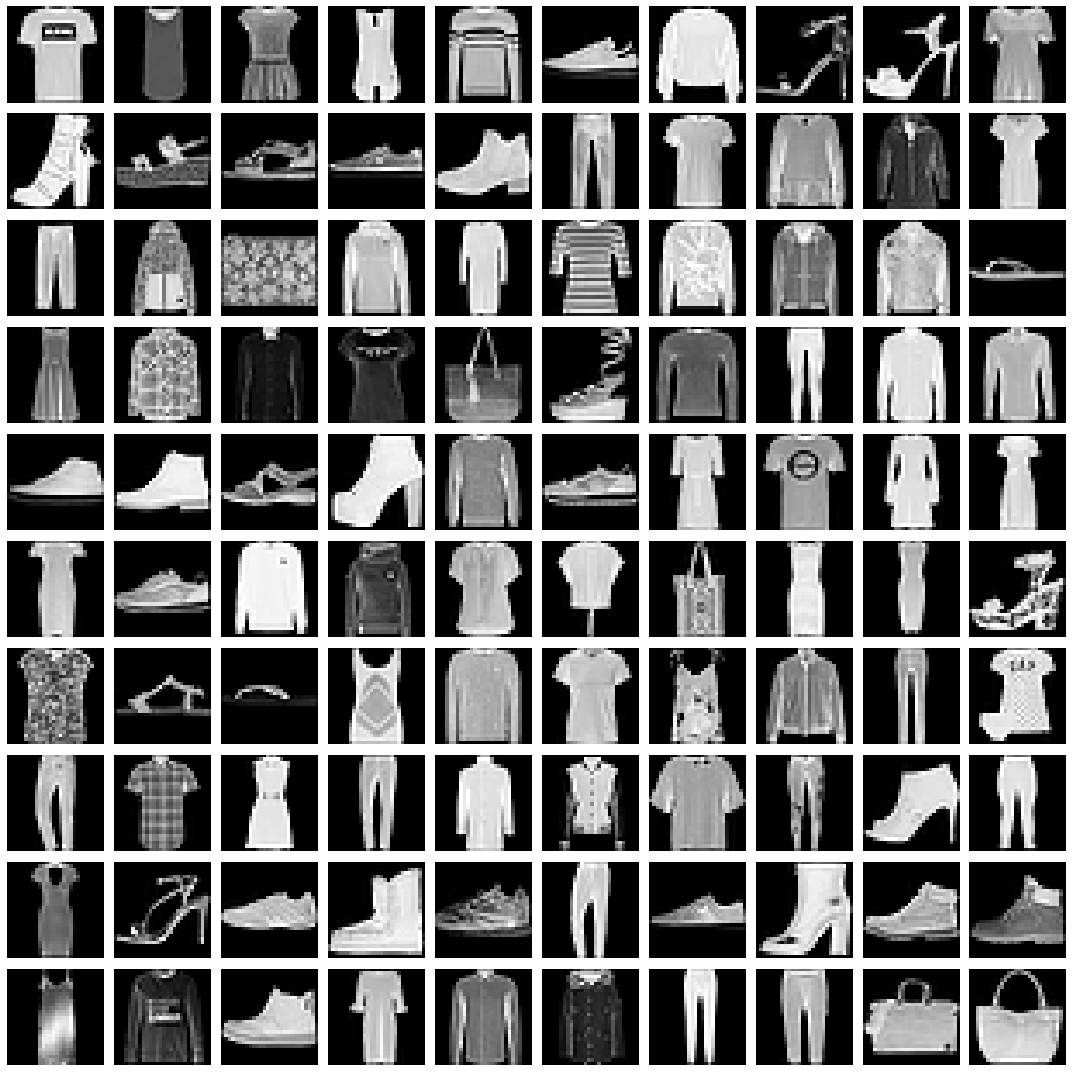

In [14]:
# Visualising The Data
plt.figure(figsize=(15,15))
for i in range(1, 101):
    plt.subplot(10,10,i)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis("off")
    plt.tight_layout()
plt.show()

In [15]:
trainX = train_images.reshape((-1,28,28,1))
trainY = np_utils.to_categorical(train_labels) # One-Hot Vectors

print(trainX.shape, trainY.shape)

(60000, 28, 28, 1) (60000, 10)


In [16]:
model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, (5,5), activation='relu'))
model.add(Convolution2D(8, (5,5), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
hist = model.fit(trainX, trainY, epochs=10, shuffle=True, batch_size=256, validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 78s 2ms/step - loss: 0.7659 - accuracy: 0.7261 - val_loss: 0.5108 - val_accuracy: 0.8296
Epoch 2/10
48000/48000 [==============================] - 78s 2ms/step - loss: 0.4335 - accuracy: 0.8447 - val_loss: 0.4107 - val_accuracy: 0.8570
Epoch 3/10
48000/48000 [==============================] - 78s 2ms/step - loss: 0.3697 - accuracy: 0.8677 - val_loss: 0.4021 - val_accuracy: 0.8655
Epoch 4/10
48000/48000 [==============================] - 77s 2ms/step - loss: 0.3309 - accuracy: 0.8819 - val_loss: 0.3348 - val_accuracy: 0.8842
Epoch 5/10
48000/48000 [==============================] - 79s 2ms/step - loss: 0.3025 - accuracy: 0.8906 - val_loss: 0.3238 - val_accuracy: 0.8873
Epoch 6/10
48000/48000 [==============================] - 88s 2ms/step - loss: 0.2818 - accuracy: 0.8981 - val_loss: 0.2999 - val_accuracy: 0.8956
Epoch 7/10
48000/48000 [==============================] - 94s 2ms/st

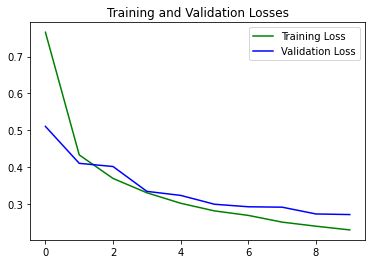

In [19]:
plt.plot(hist.history['loss'],'g',label="Training Loss")
plt.plot(hist.history['val_loss'],'b',label="Validation Loss")
plt.title("Training and Validation Losses")
plt.legend()
plt.show()

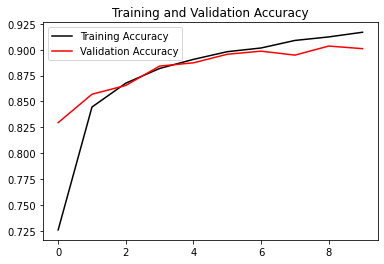

In [20]:
plt.plot(hist.history['accuracy'],'black',label="Training Accuracy")
plt.plot(hist.history['val_accuracy'],'r',label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

In [21]:
testX = test_images.reshape((-1,28,28,1))
testY = np_utils.to_categorical(test_labels) # One-Hot Vectors

print(testX.shape, testY.shape)

(10000, 28, 28, 1) (10000, 10)


In [22]:
test_loss, test_acc = model.evaluate(testX, testY)
print('Testing accuracy  : ', 100 * round(test_acc,4), " %")

train_loss, train_acc = model.evaluate(trainX, trainY)
print('Training accuracy : ', 100 * round(train_acc,4), " %")

10000/10000 [==============================] - 9s 929us/step
Testing accuracy  :  90.23  %
60000/60000 [==============================] - 55s 910us/step
Training accuracy :  91.93  %
